# Home Cage Interaction Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac_csvs"

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n3-240509-062454\Notes.txt
read from t=0s to t=1803.43s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n4-240509-075317\Notes.txt
read from t=0s to t=1802.32s
Processing n1-240508-080051...
Processing n2-240508-092906...
Processing n3-240509-062454...
Processing n4-240509-075317...


In [4]:
group_data.hc_processing()

Processing n1-240508-080051...
Processing n2-240508-092906...
Processing n3-240509-062454...
Processing n4-240509-075317...


## Average Investigation Time Per bout

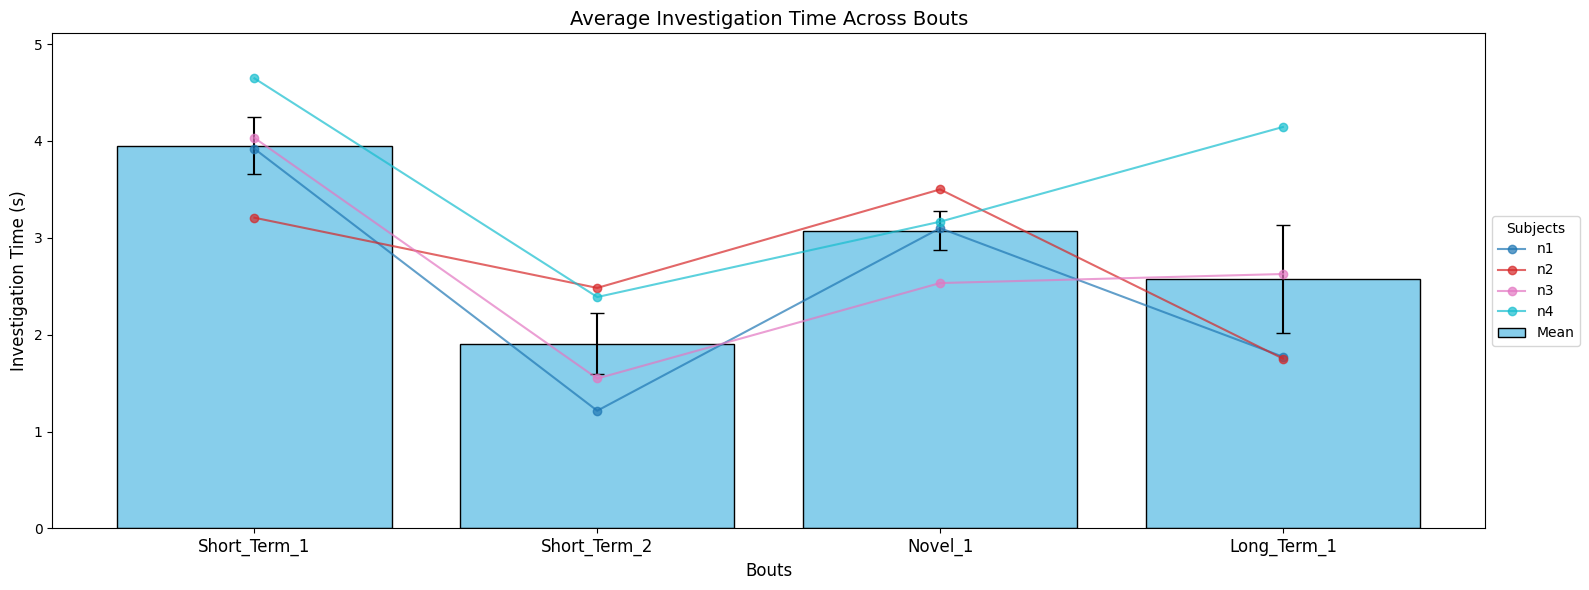

In [5]:
# Define the columns representing the bouts
columns = ['Short_Term_1', 'Short_Term_2', 'Novel_1', 'Long_Term_1']

avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')

plot_y_across_bouts(avg_inv_duration_df, 'Average Investigation Time Across Bouts','Investigation Time (s)')

## Average Total Investigation Duration per bout

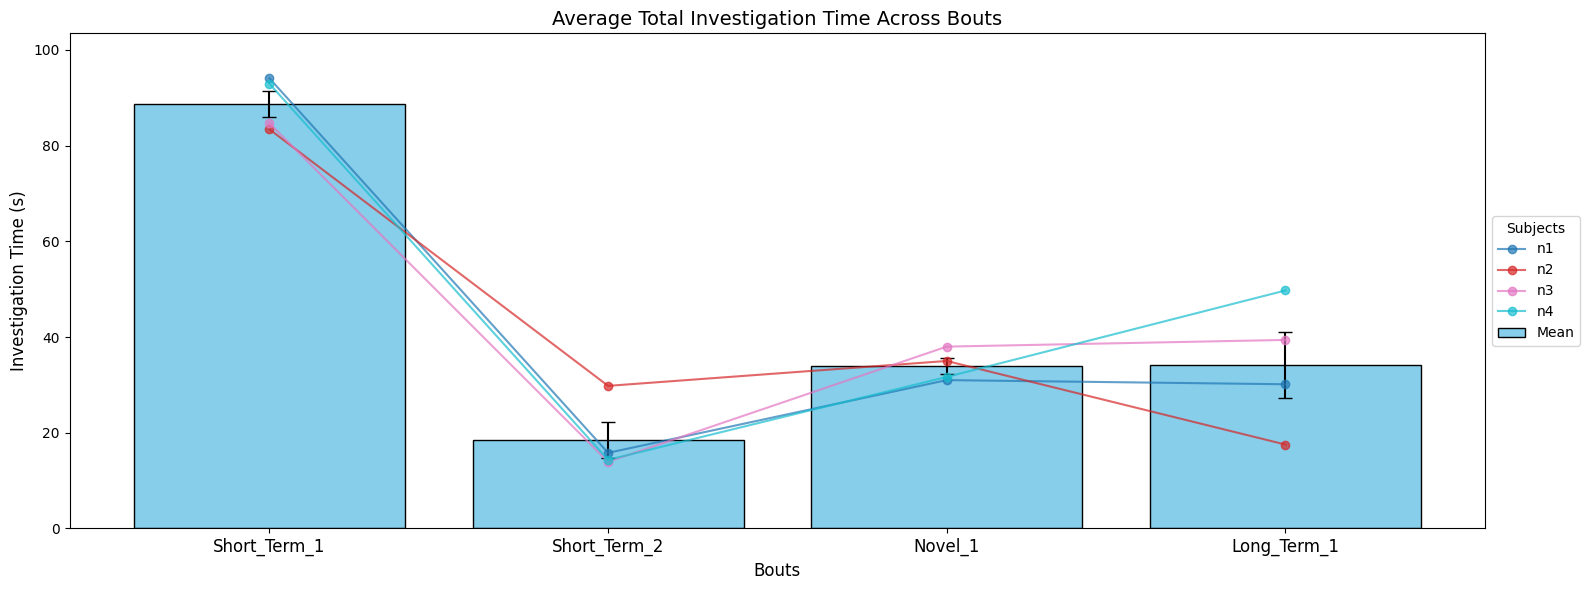

In [6]:
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')

plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)')

## Mean DA During 1st and 5th Investigation

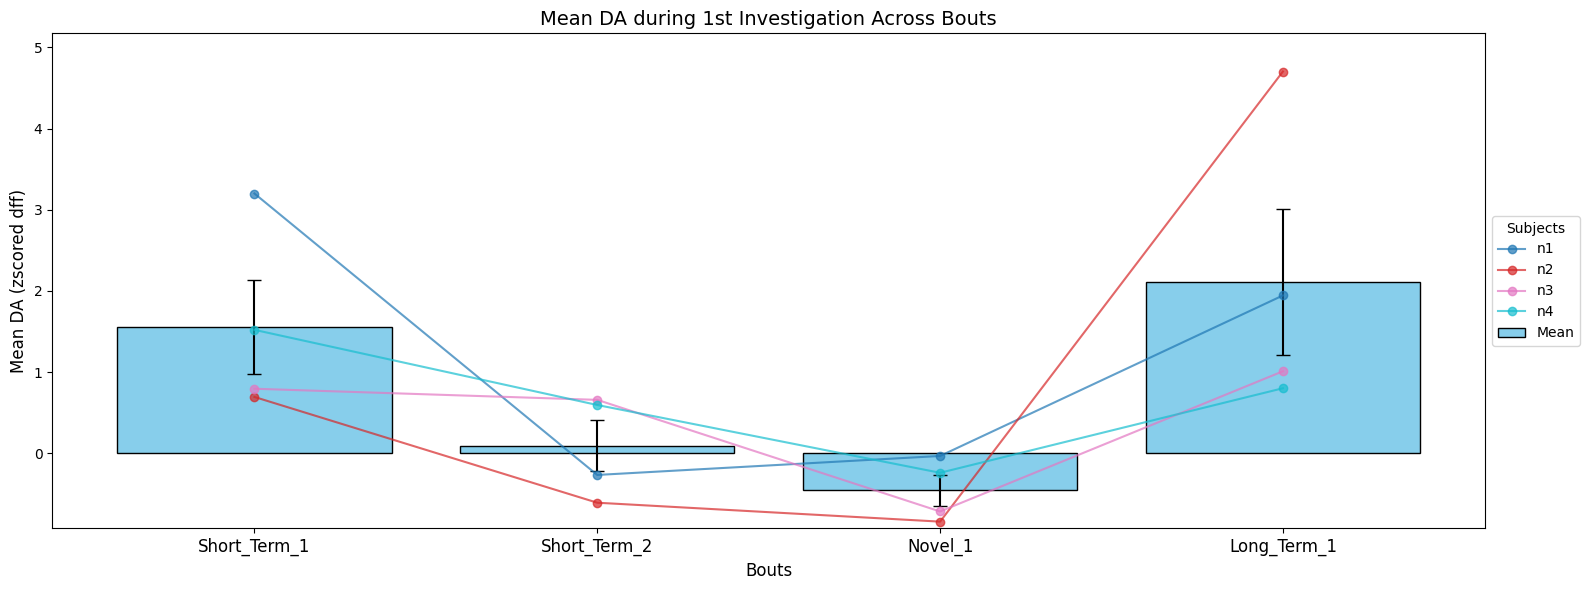

In [7]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 1)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')

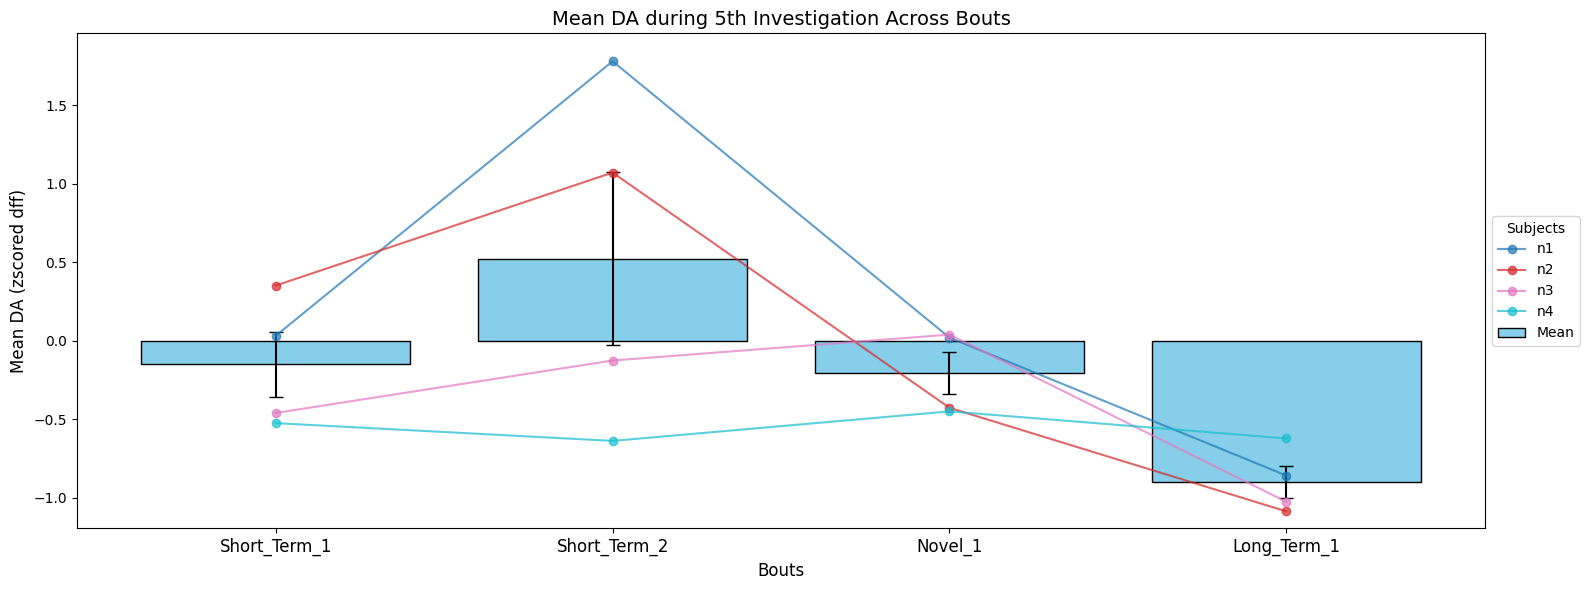

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 5)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 5th Investigation Across Bouts','Mean DA (zscored dff)')

## Correlation between Investigations and DA Response

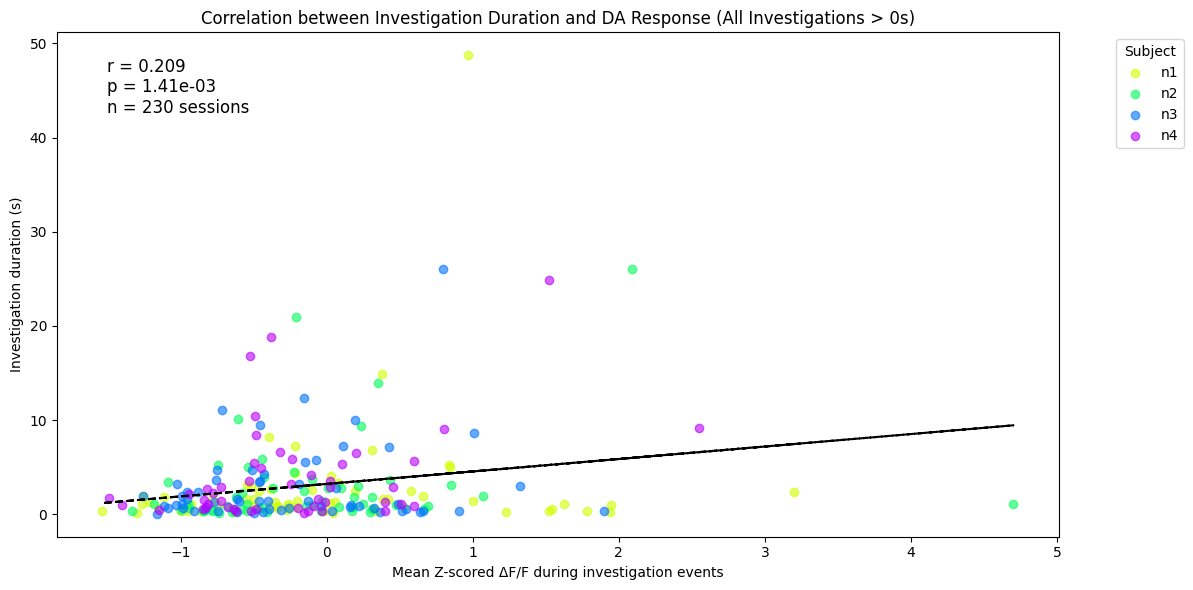

In [9]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

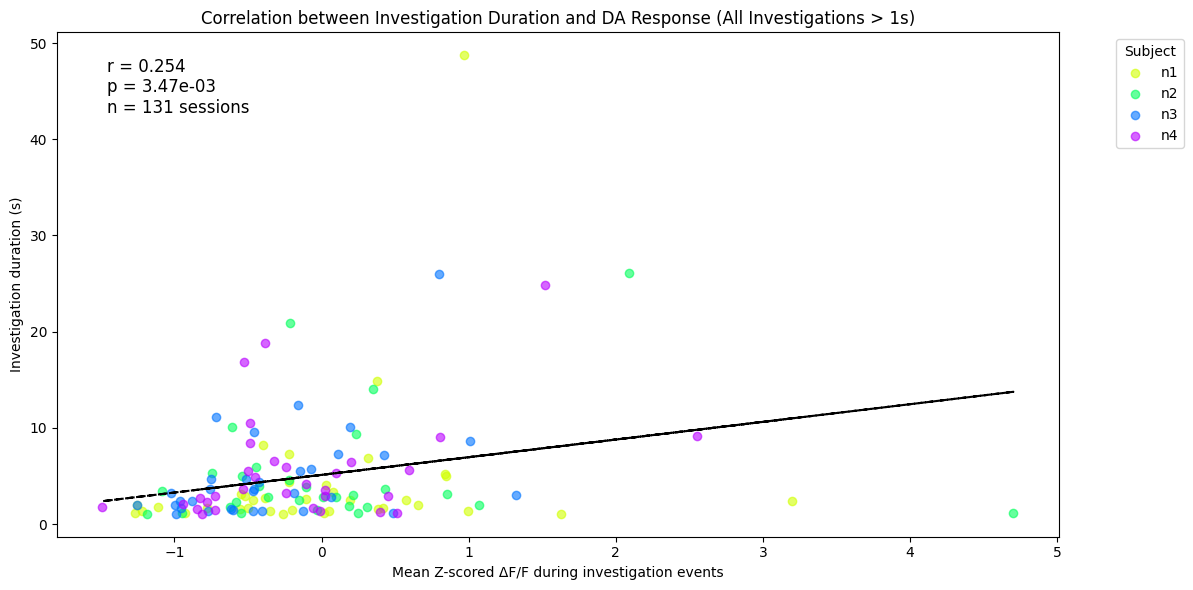

In [10]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=1)

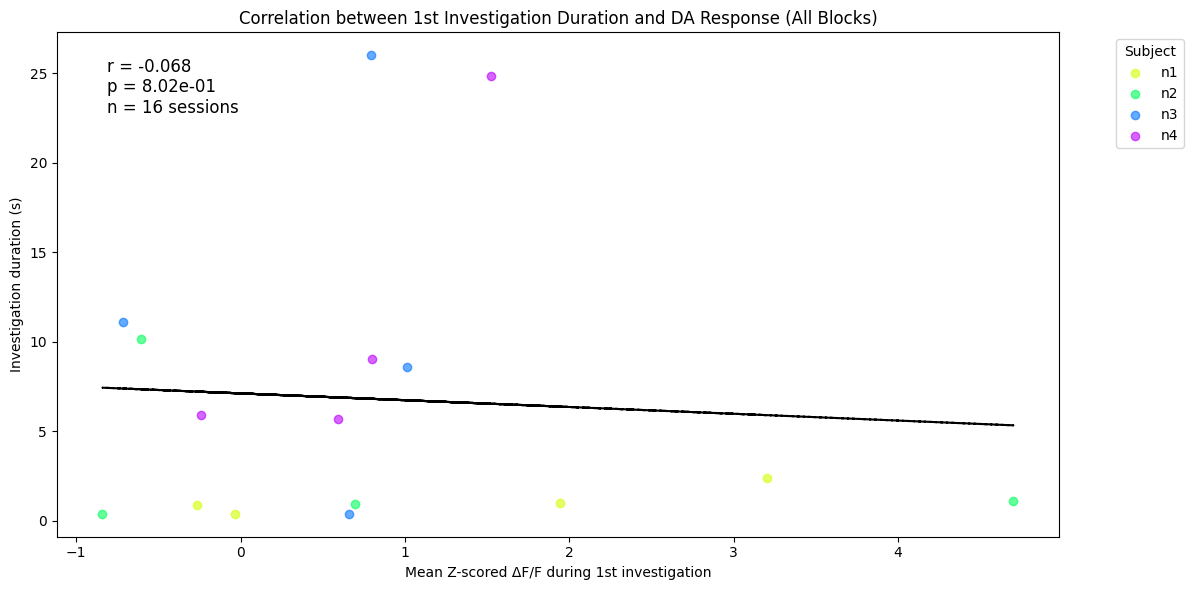

In [11]:
group_data.plot_1st_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

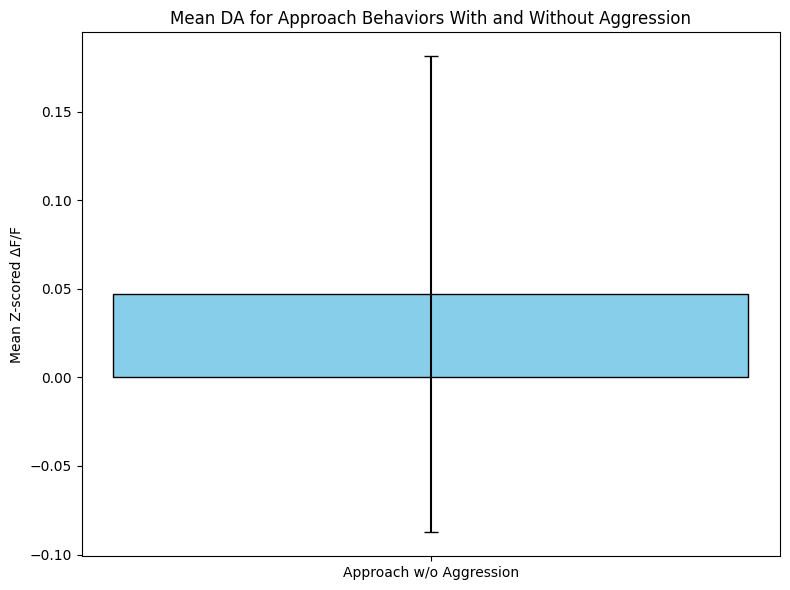

In [12]:
plot_approach_vs_aggression(group_data=group_data, min_duration=0)

In [13]:
def find_none_total_duration_all_behaviors(group_data):
    """
    Finds and prints the subject, start time, and behavior where 'Total Duration' is None for any behavior.
    
    Parameters:
    group_data (object): The object containing bout data for each subject.
    """
    none_count = 0  # Counter to keep track of the number of None occurrences

    # Loop through each block in group_data.blocks
    for block_name, block_data in group_data.blocks.items():
        if hasattr(block_data, 'bout_dict') and block_data.bout_dict:  # Ensure bout_dict exists and is populated
            subject = block_data.subject_name  # Extract the subject name
            for bout, behavior_data in block_data.bout_dict.items():
                # Loop through each behavior in the bout_data
                for behavior_name, events in behavior_data.items():
                    for event in events:
                        # Check if 'Total Duration' is None
                        if event.get('Total Duration') is None:
                            none_count += 1
                            start_time = event.get('Start Time', 'Unknown')  # Get start time or 'Unknown' if not available
                            print(f"NoneType found - Subject: {subject}, Start Time: {start_time}, Behavior: {behavior_name}")
    
    # Print summary
    if none_count == 0:
        print("No NoneType 'Total Duration' found for any behavior.")
    else:
        print(f"Total 'NoneType' occurrences found: {none_count}")


# Example usage
find_none_total_duration_all_behaviors(group_data)


No NoneType 'Total Duration' found for any behavior.


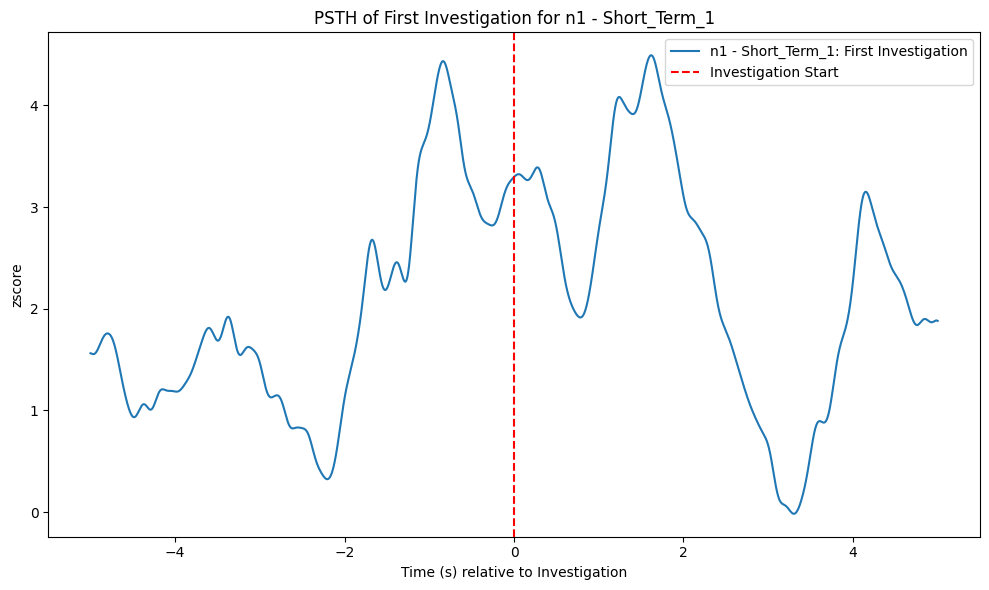

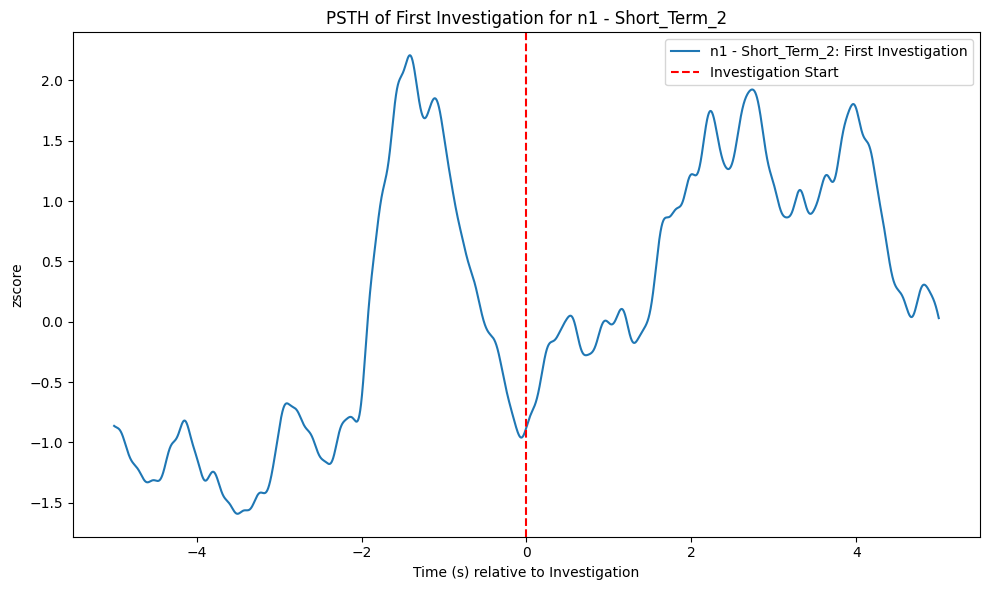

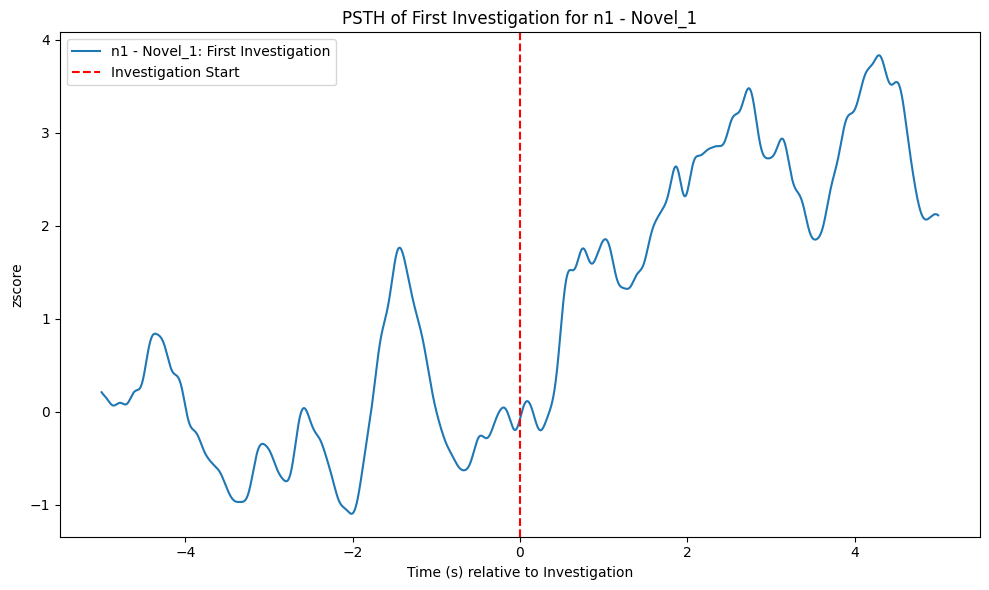

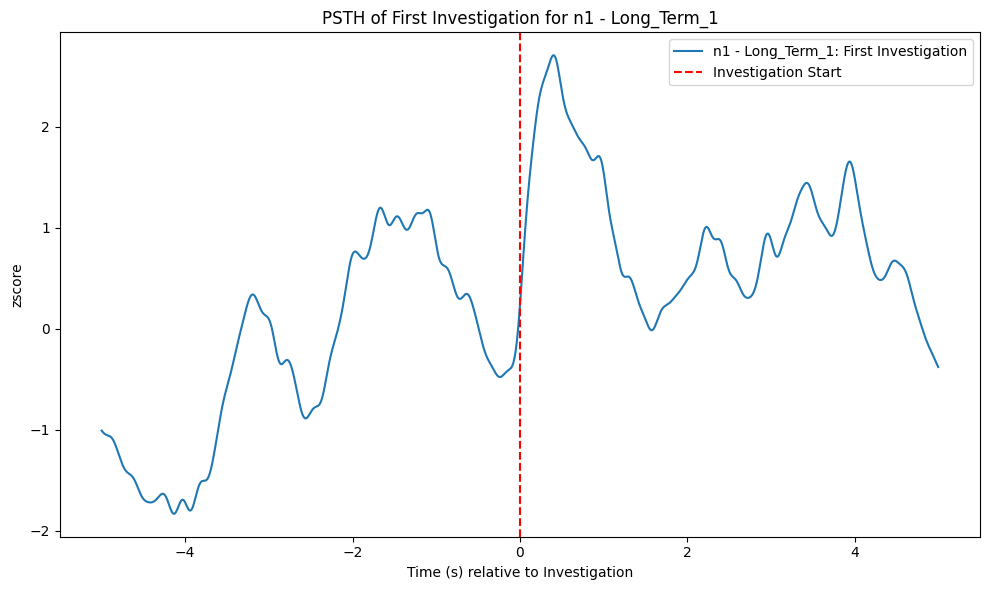

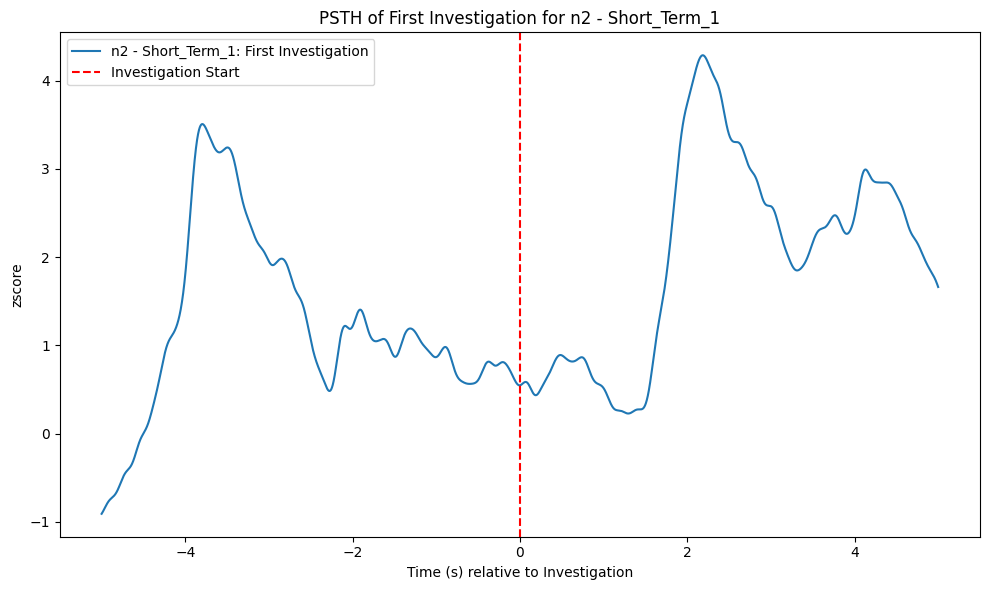

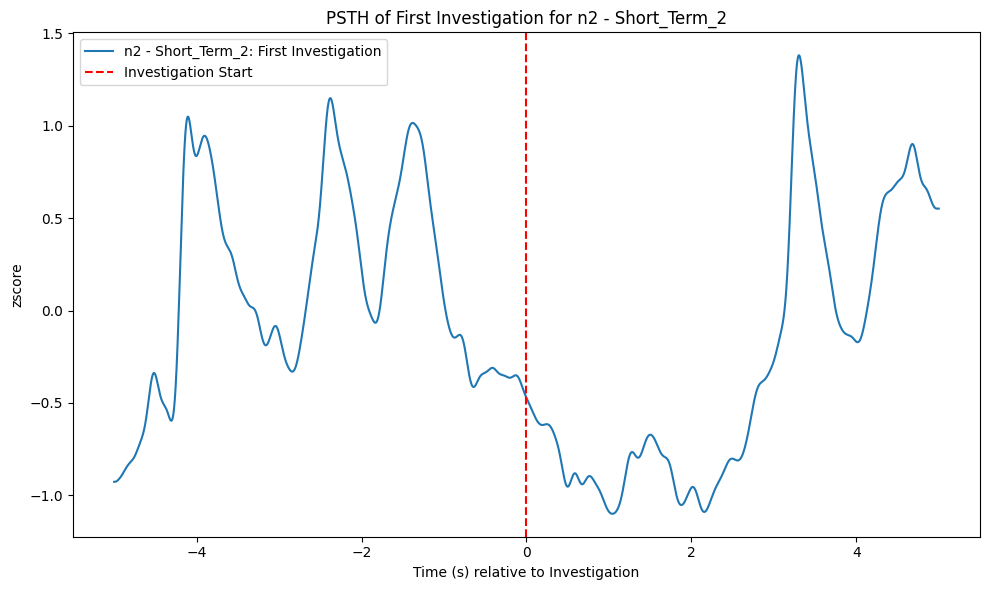

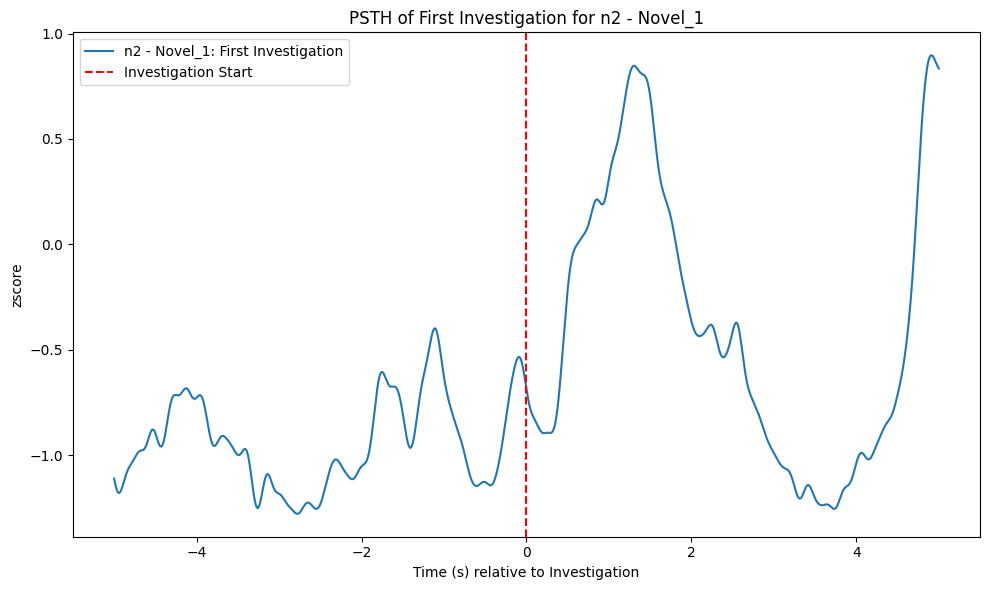

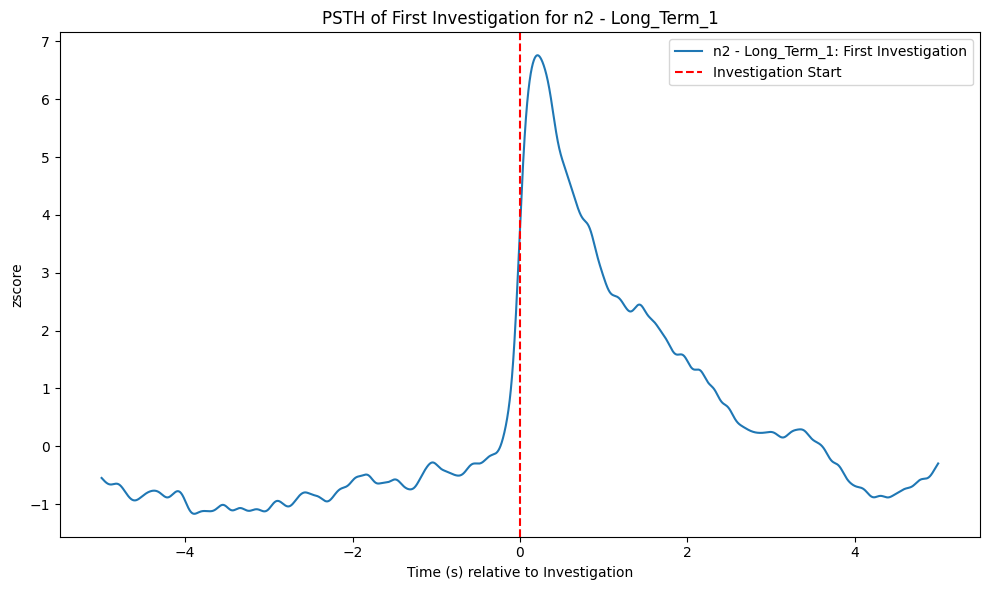

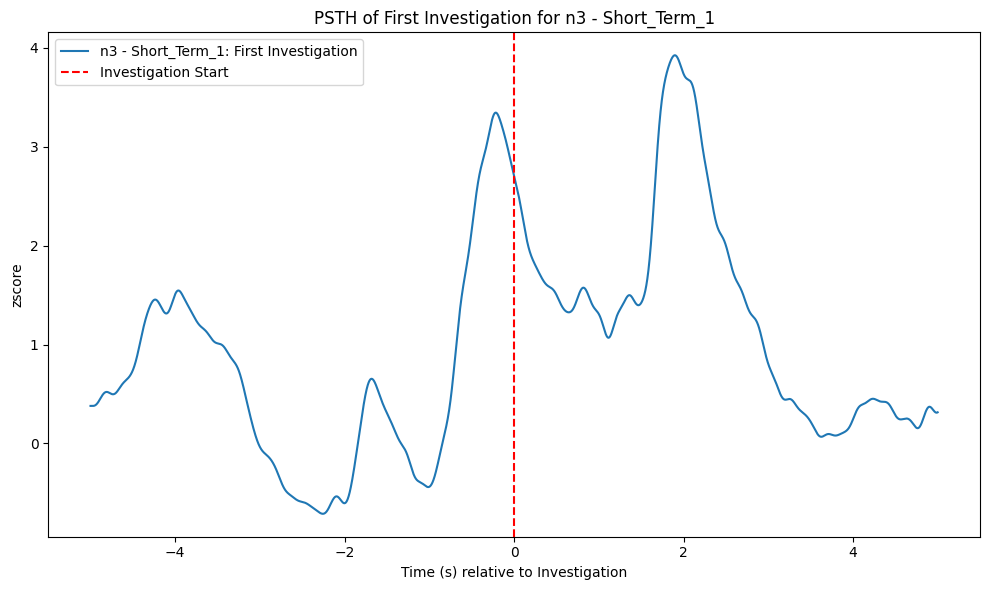

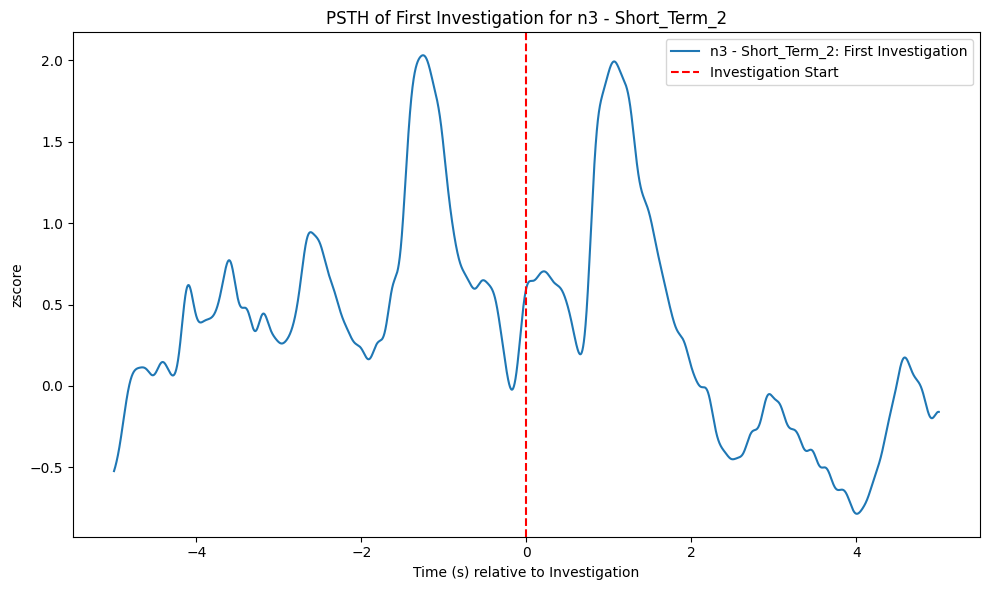

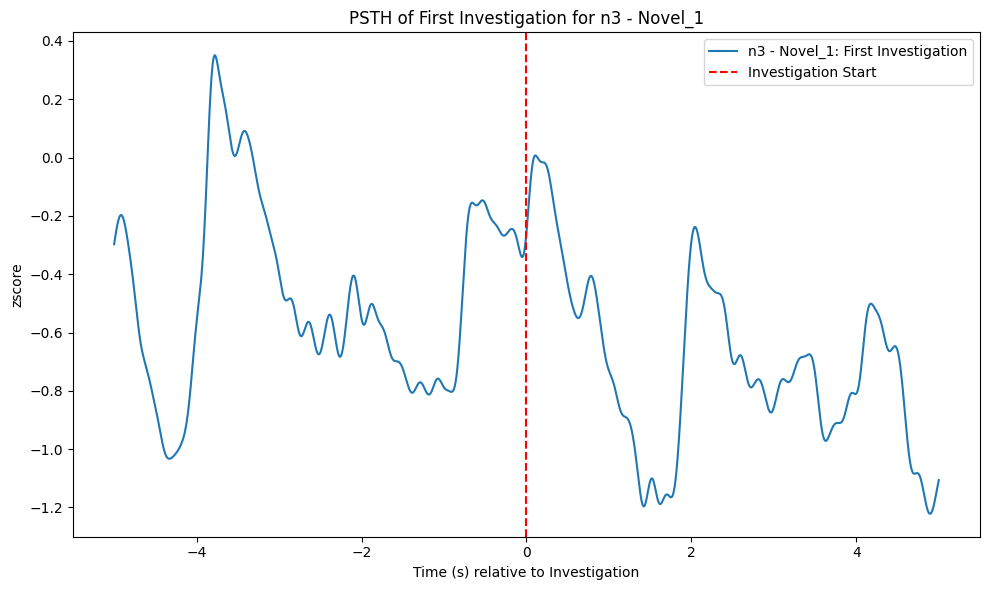

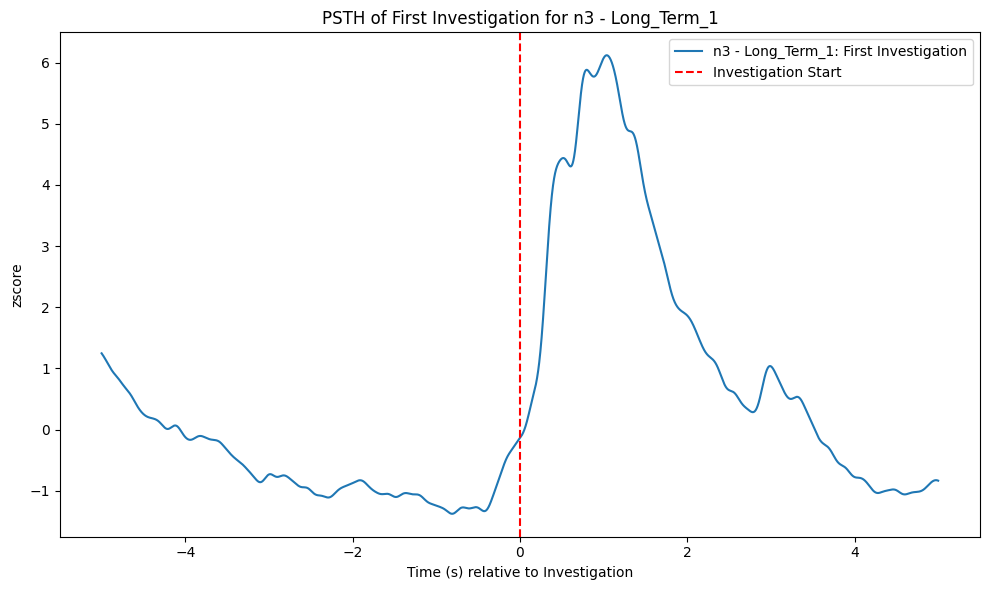

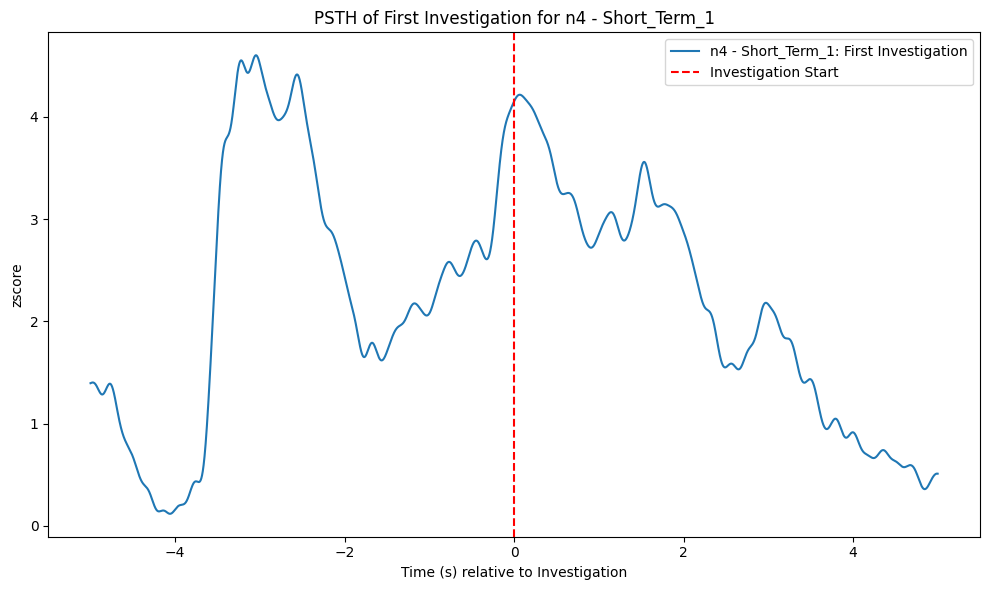

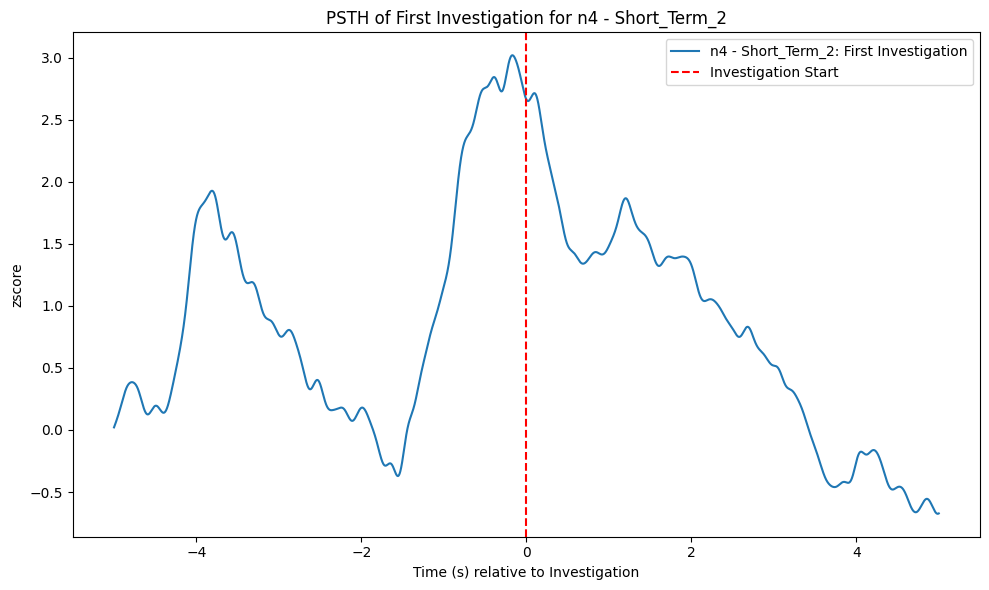

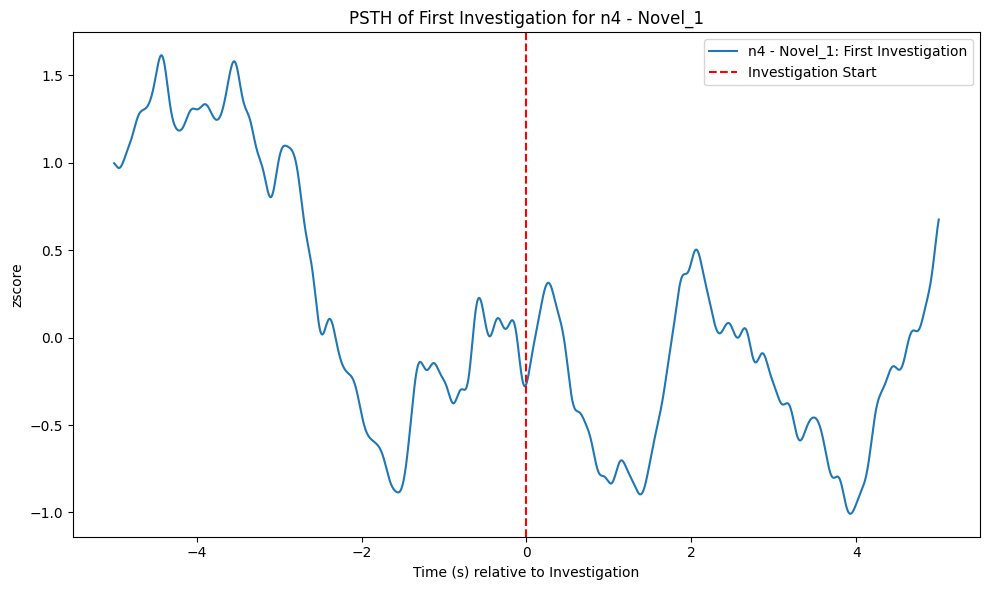

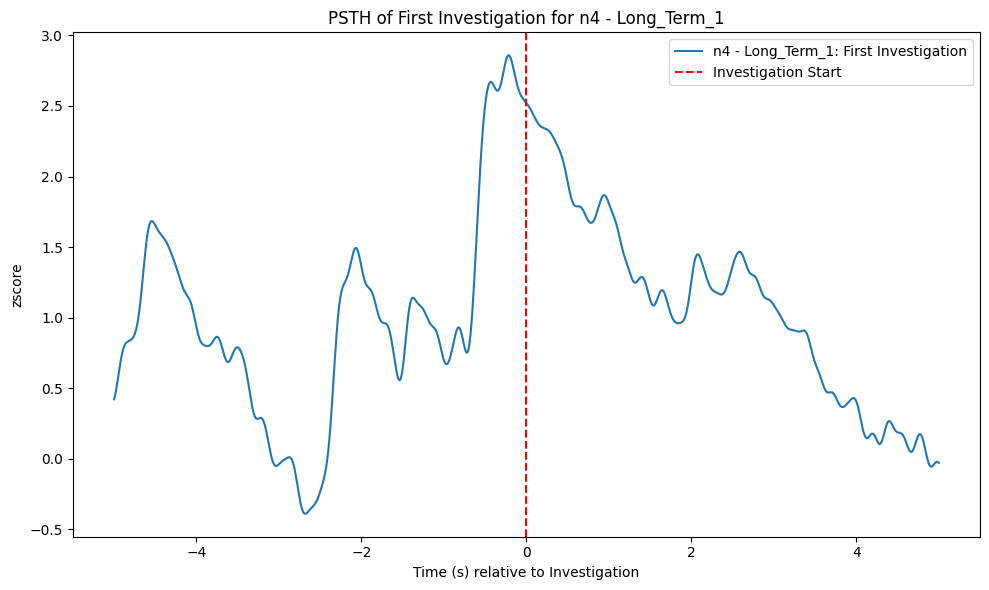

In [14]:
plot_first_investigation_psth_all_bouts(group_data=group_data,pre_time=5,post_time=5,signal_type='zscore')

In [15]:
group_data.compute_group_psth(behavior_name='Investigation', pre_time=5, post_time=5, signal_type='zscore')

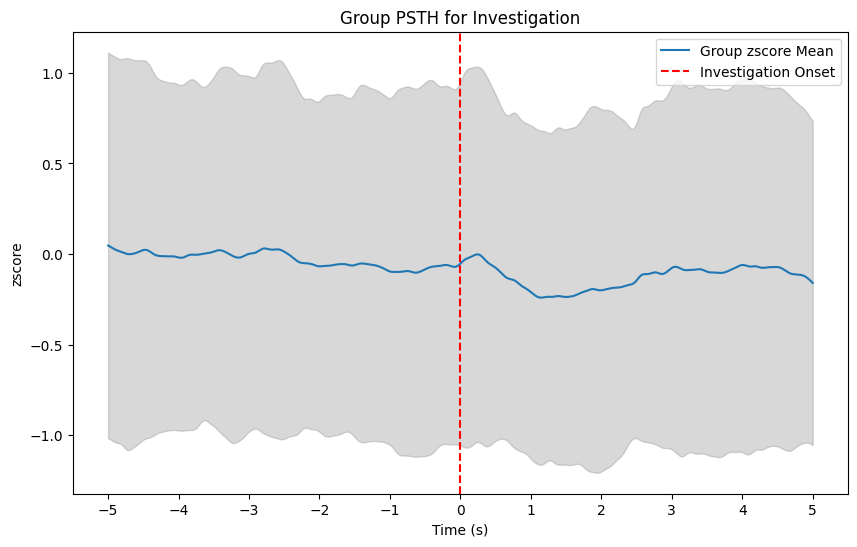

In [16]:
group_data.plot_group_psth(behavior_name='Investigation', pre_time=5, post_time=5, signal_type='zscore')

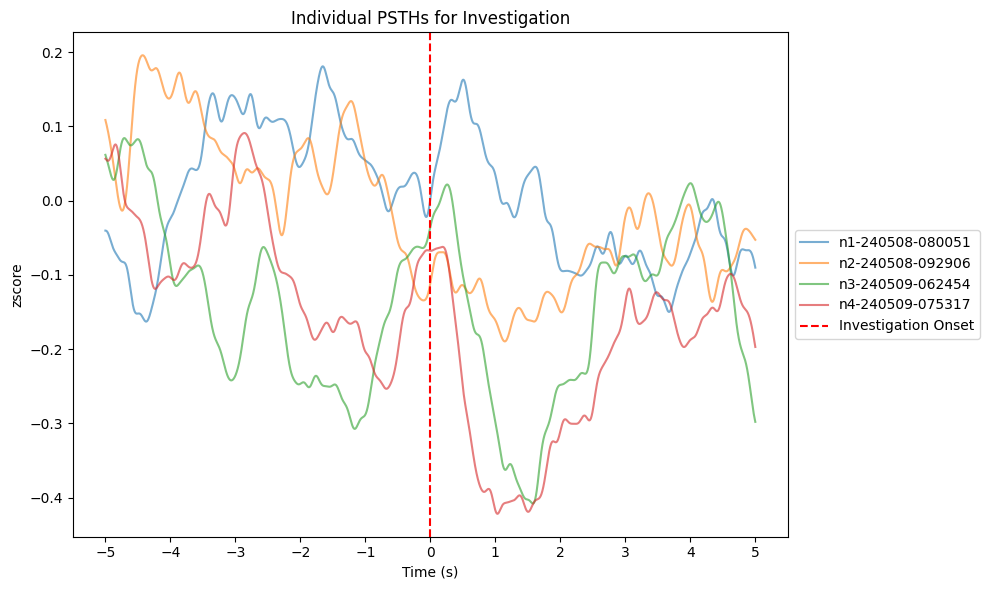

In [18]:
group_data.plot_all_individual_psth(behavior_name='Investigation', pre_time=5, post_time=5, signal_type='zscore')


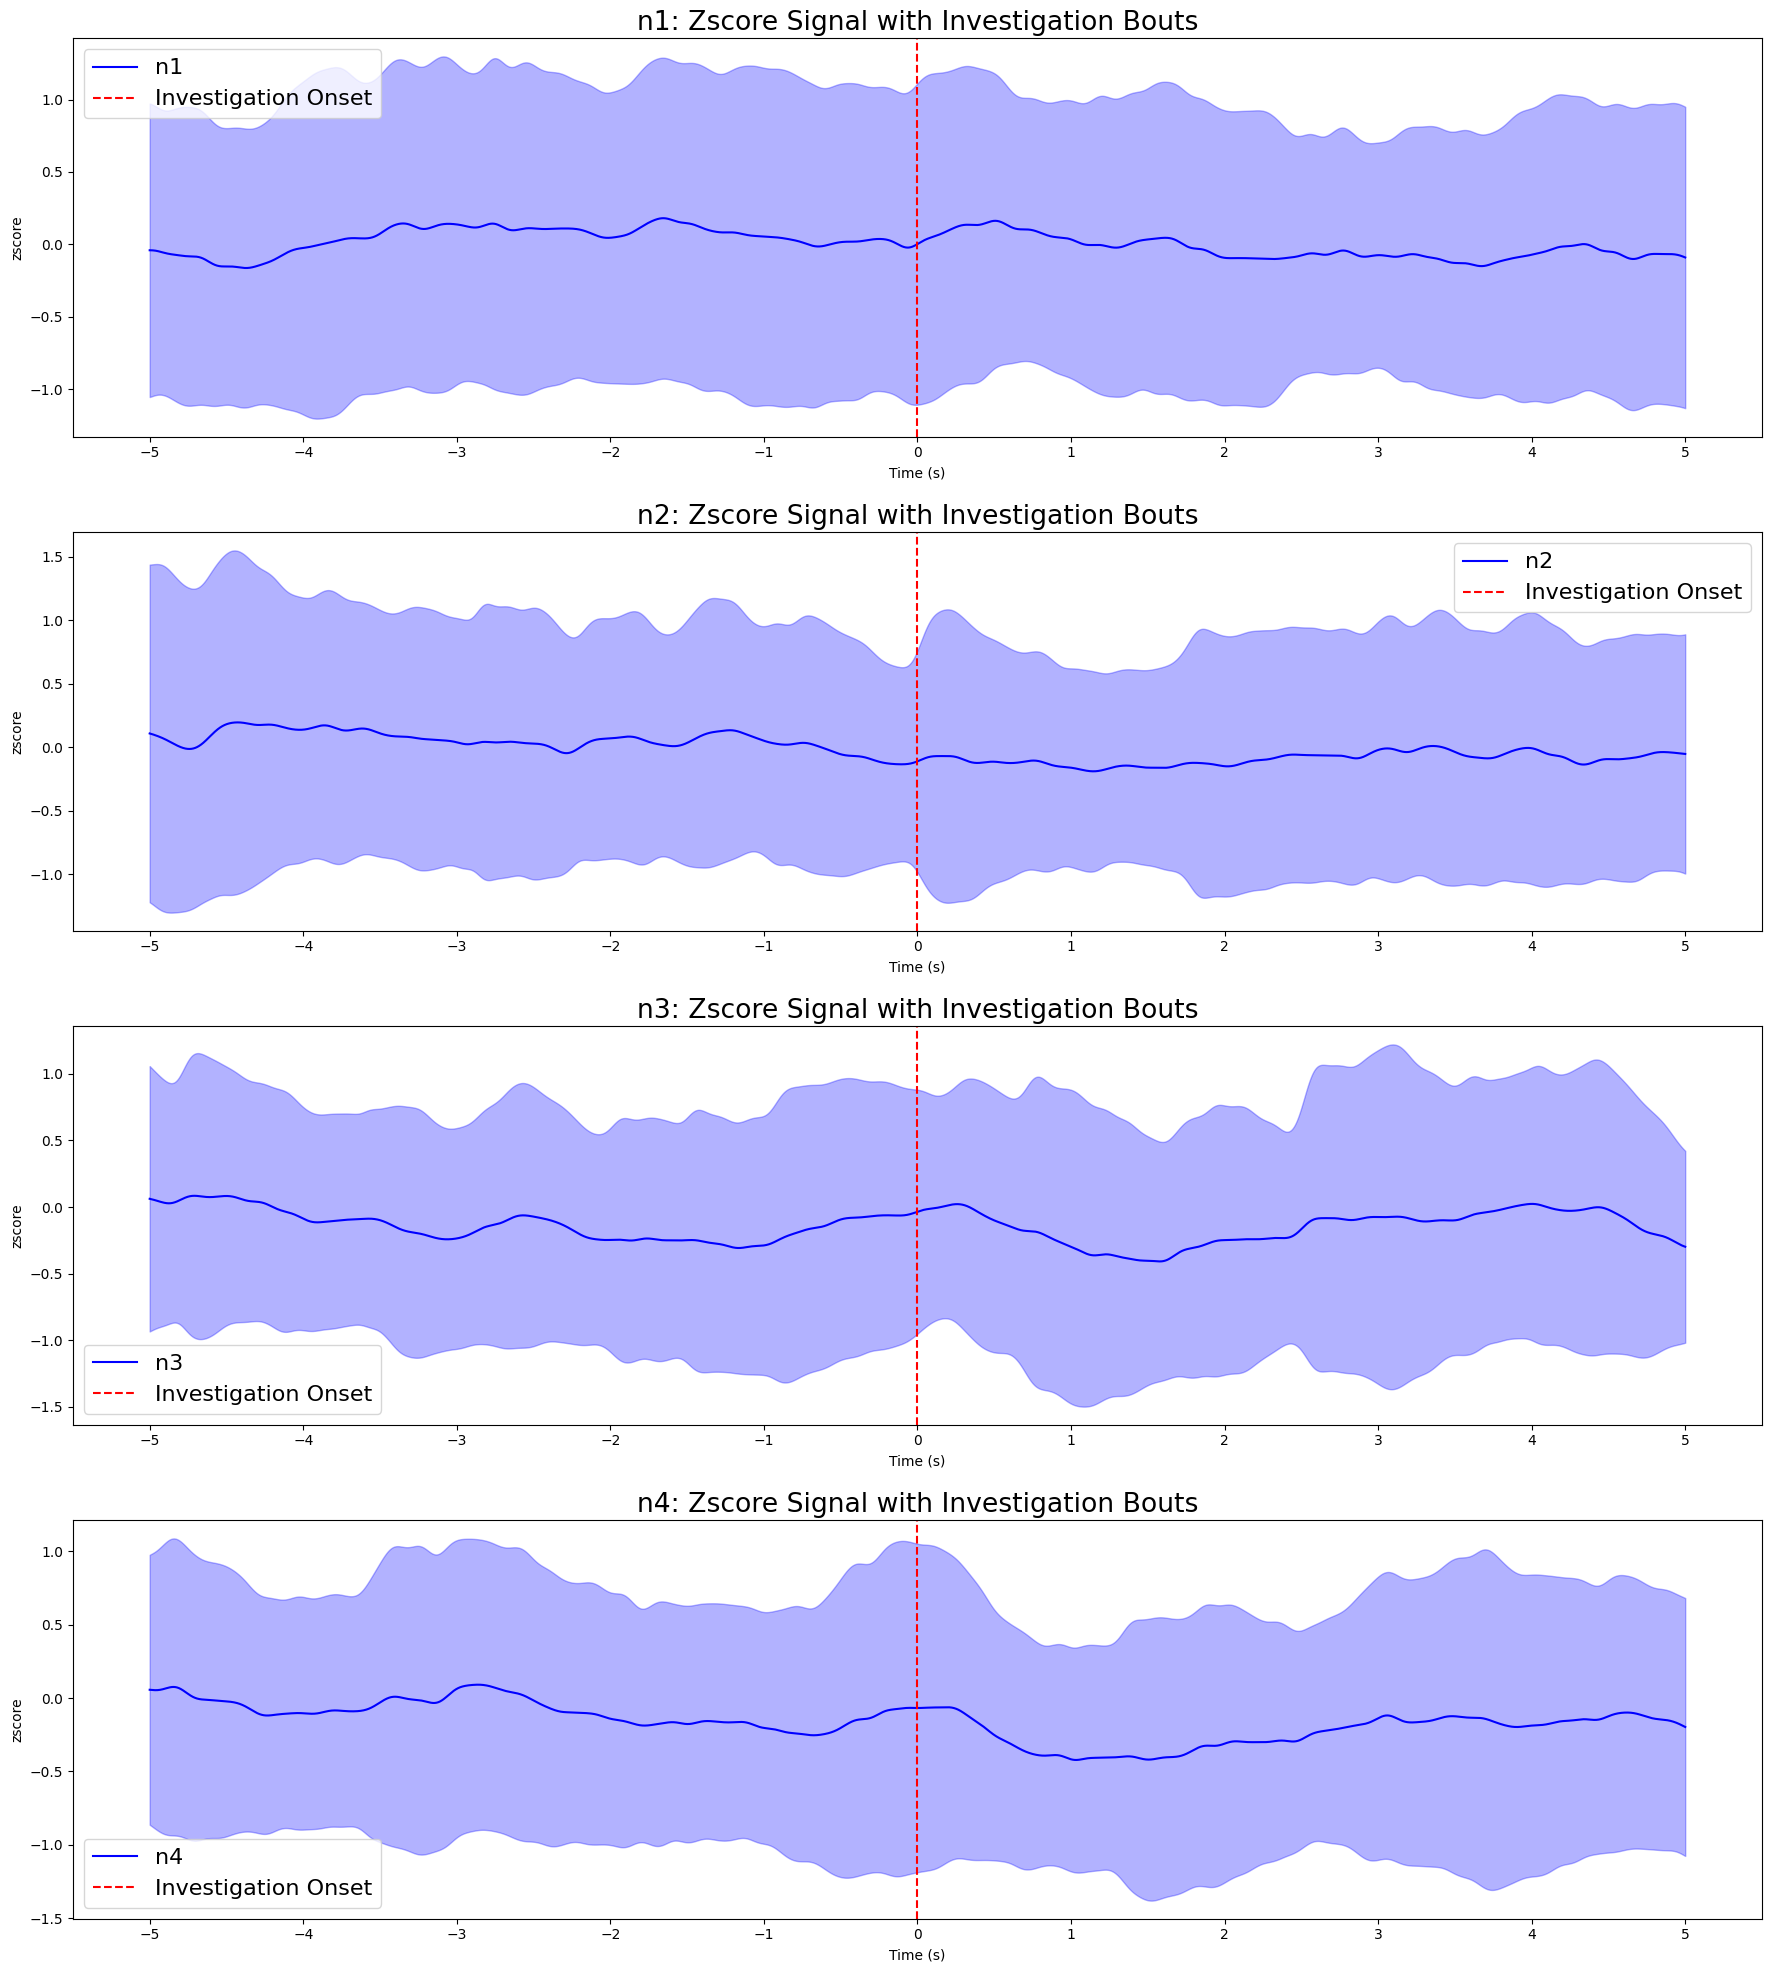

In [18]:
group_data.plot_individual_psths(behavior_name='Investigation', pre_time=5, post_time=5, signal_type='zscore')